Marcus Miranda 

Tiago Ponte

In [70]:
#Atividade
#1 - Implementar um modelo de Regressão Linear 
#2 - Implementar um modelo de Classificação 

In [71]:
#1 - Implementar um modelo de Regressão Linear 

In [72]:
#Importando biblioteca

In [73]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn import datasets
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.dummy import DummyRegressor

In [74]:
# carregando os dados

In [75]:
df_boston = load_boston()

In [76]:
# Explorando os dados (Chaves de dicionarios disponiveis)

In [77]:
print(df_boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [78]:
# Explorando os dados (tamanho do conjunto de dados - Linhas x colunas)

In [79]:
print(df_boston.data.shape)

(506, 13)


In [80]:
# Explorando os dados (tamanho do conjunto de dados - Linhas x colunas)

In [81]:
print(df_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [82]:
# Informações sobre atributos (em ordem):
#CRIM  - Taxa de criminalidade per capita por cidade
#ZN    - Proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados.
#INDUS - Proporção de acres comerciais não comerciais por cidade
#CHAS  - Variável fictícia Charles River (= 1 se o trecho limita o rio; Q caso contrário)
#NOX   - concentração de óxidos nítricos NOX (partes por 10 milhões)
#RM    - número médio de quartos por habitação
#AGE   - Proporção de unidades ocupadas pelos proprietários construídas antes de 1940
#DIS   - Distâncias ponderadas para cinco centros de emprego em Boston
#RAD   - Índice de acessibilidade às rodovias 
#TAX   - TAXA de imposto sobre a propriedade de valor total por US $ 10.000
#PTRATIO - Proporção aluno-professor  por cidade
#B       - 1000 (Bk - 0,63) A2, onde Bk é a proporção de negros por cidade
#LSTAT   - % menor status da população
#MEDV    - Valor médio das casas ocupadas pelos proprietários em US $ 1000

In [83]:
#Convertendo em pandas

In [84]:
data_frame_pandas  = pd.DataFrame(df_boston.data)
data_frame_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [85]:
#Alterando o nome da coluna, com base nas features

In [86]:
data_frame_pandas.columns = df_boston.feature_names
data_frame_pandas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [87]:
#Adicionando a coluna preço no data frame

In [88]:
data_frame_pandas['PRICE'] = df_boston.target
data_frame_pandas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [89]:
#Adicionado o Sumário estatistico

In [90]:
data_frame_pandas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [91]:
data_frame_pandas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


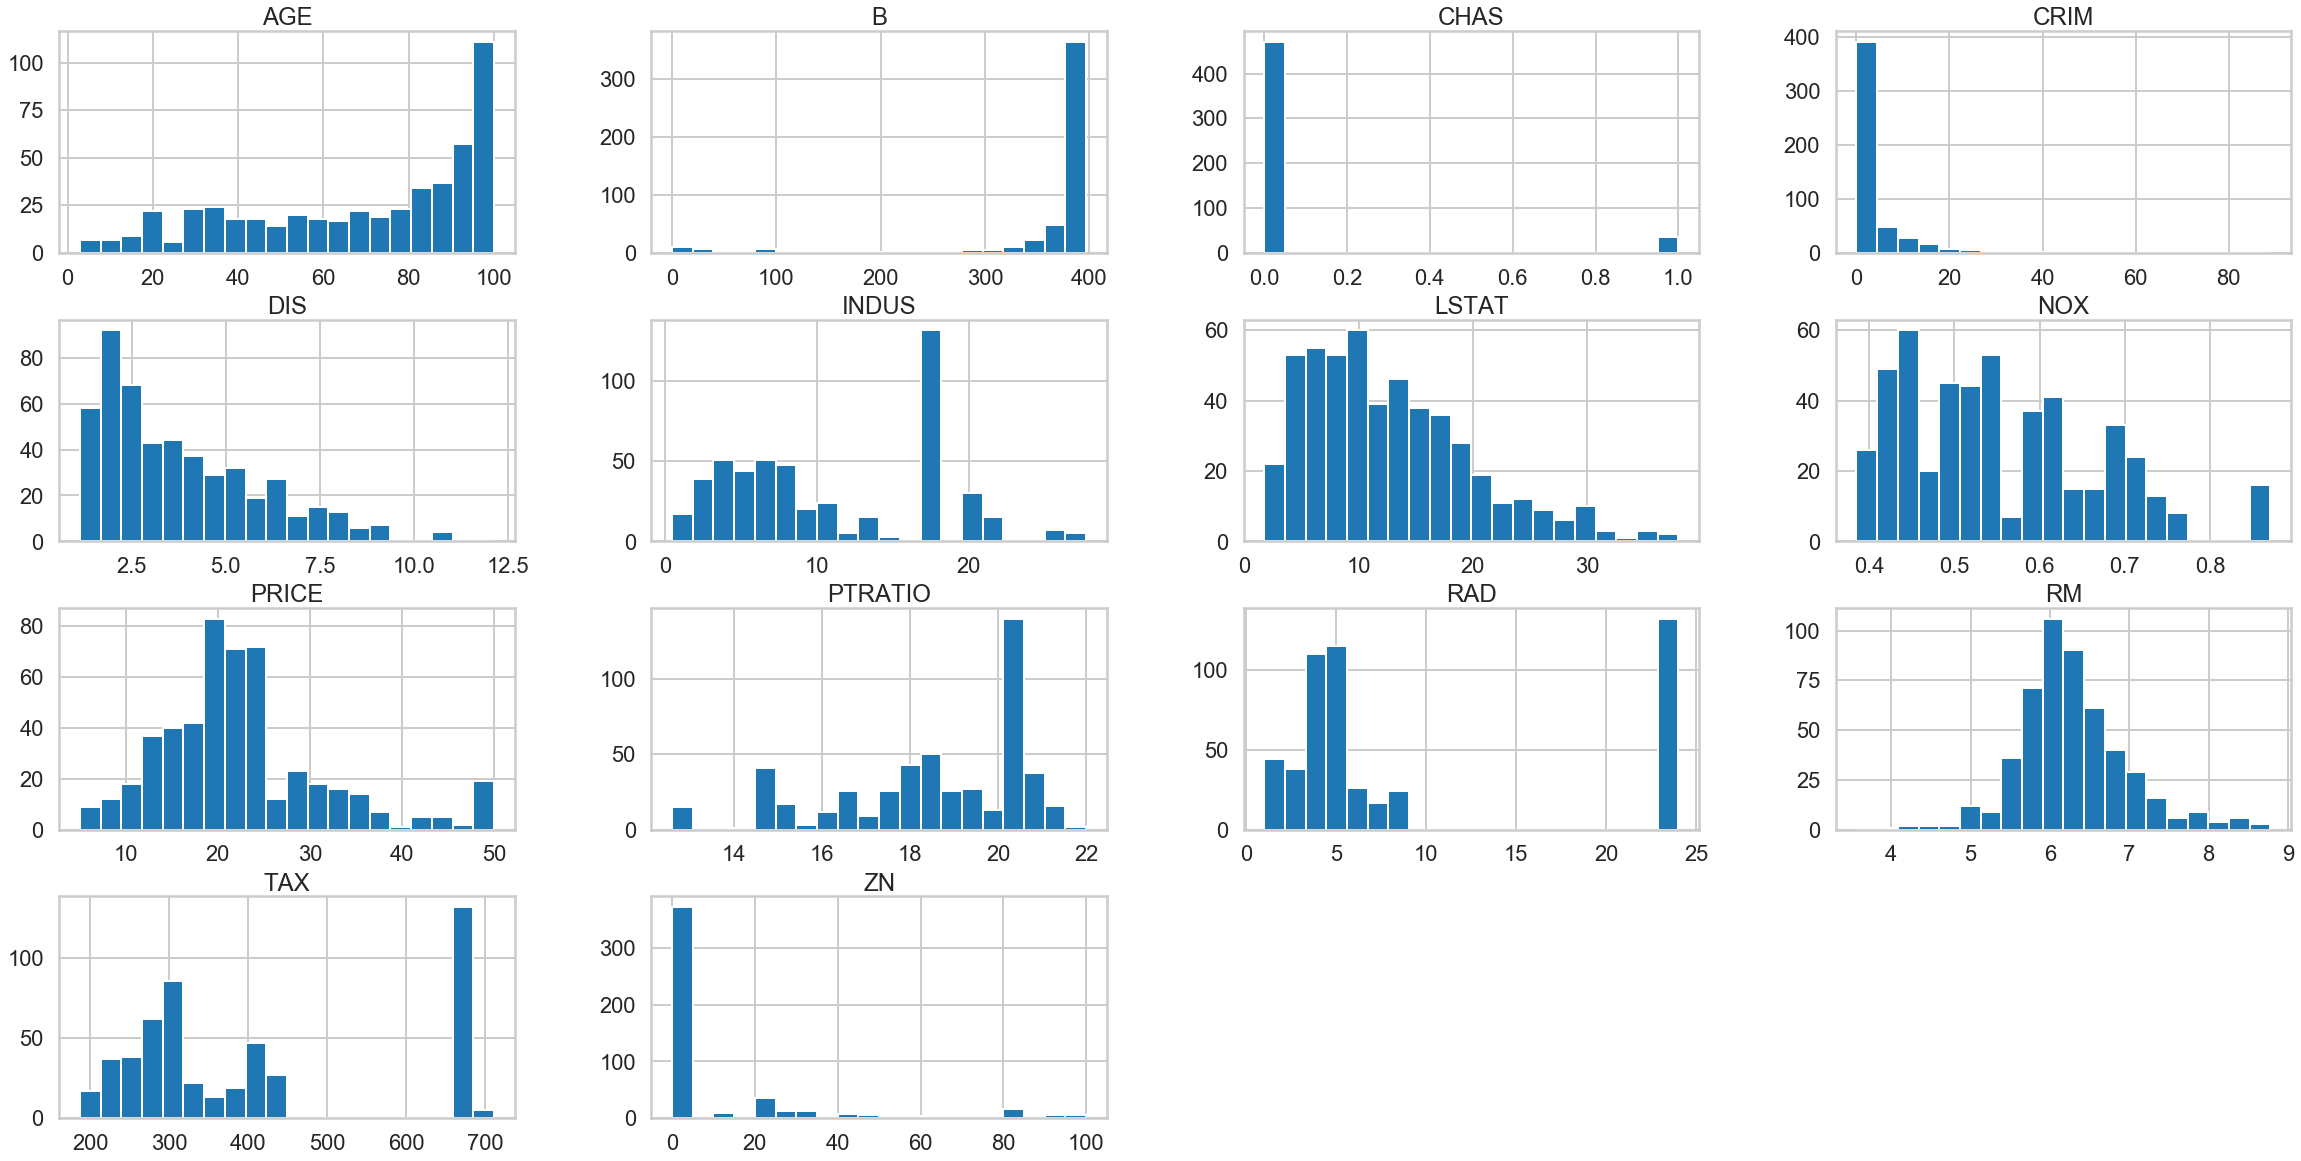

In [92]:
g=data_frame_pandas.hist(bins=20, figsize=(40,20)) # Histograms


In [93]:
# X = df_boston.data
# y = df_boston.target

#Separar os dados de Treino e Teste
#neste caso estamos atribuindo a X todos os recursos, exceto o preço
X = data_frame_pandas.drop('PRICE', axis = 1)

#Separar os dados de Treino e Teste
#neste caso estamos atribuindo a Y somente o preço
y = data_frame_pandas['PRICE']

In [94]:
#Testando os valores de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)

r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.74
R2 no set de teste: 0.73


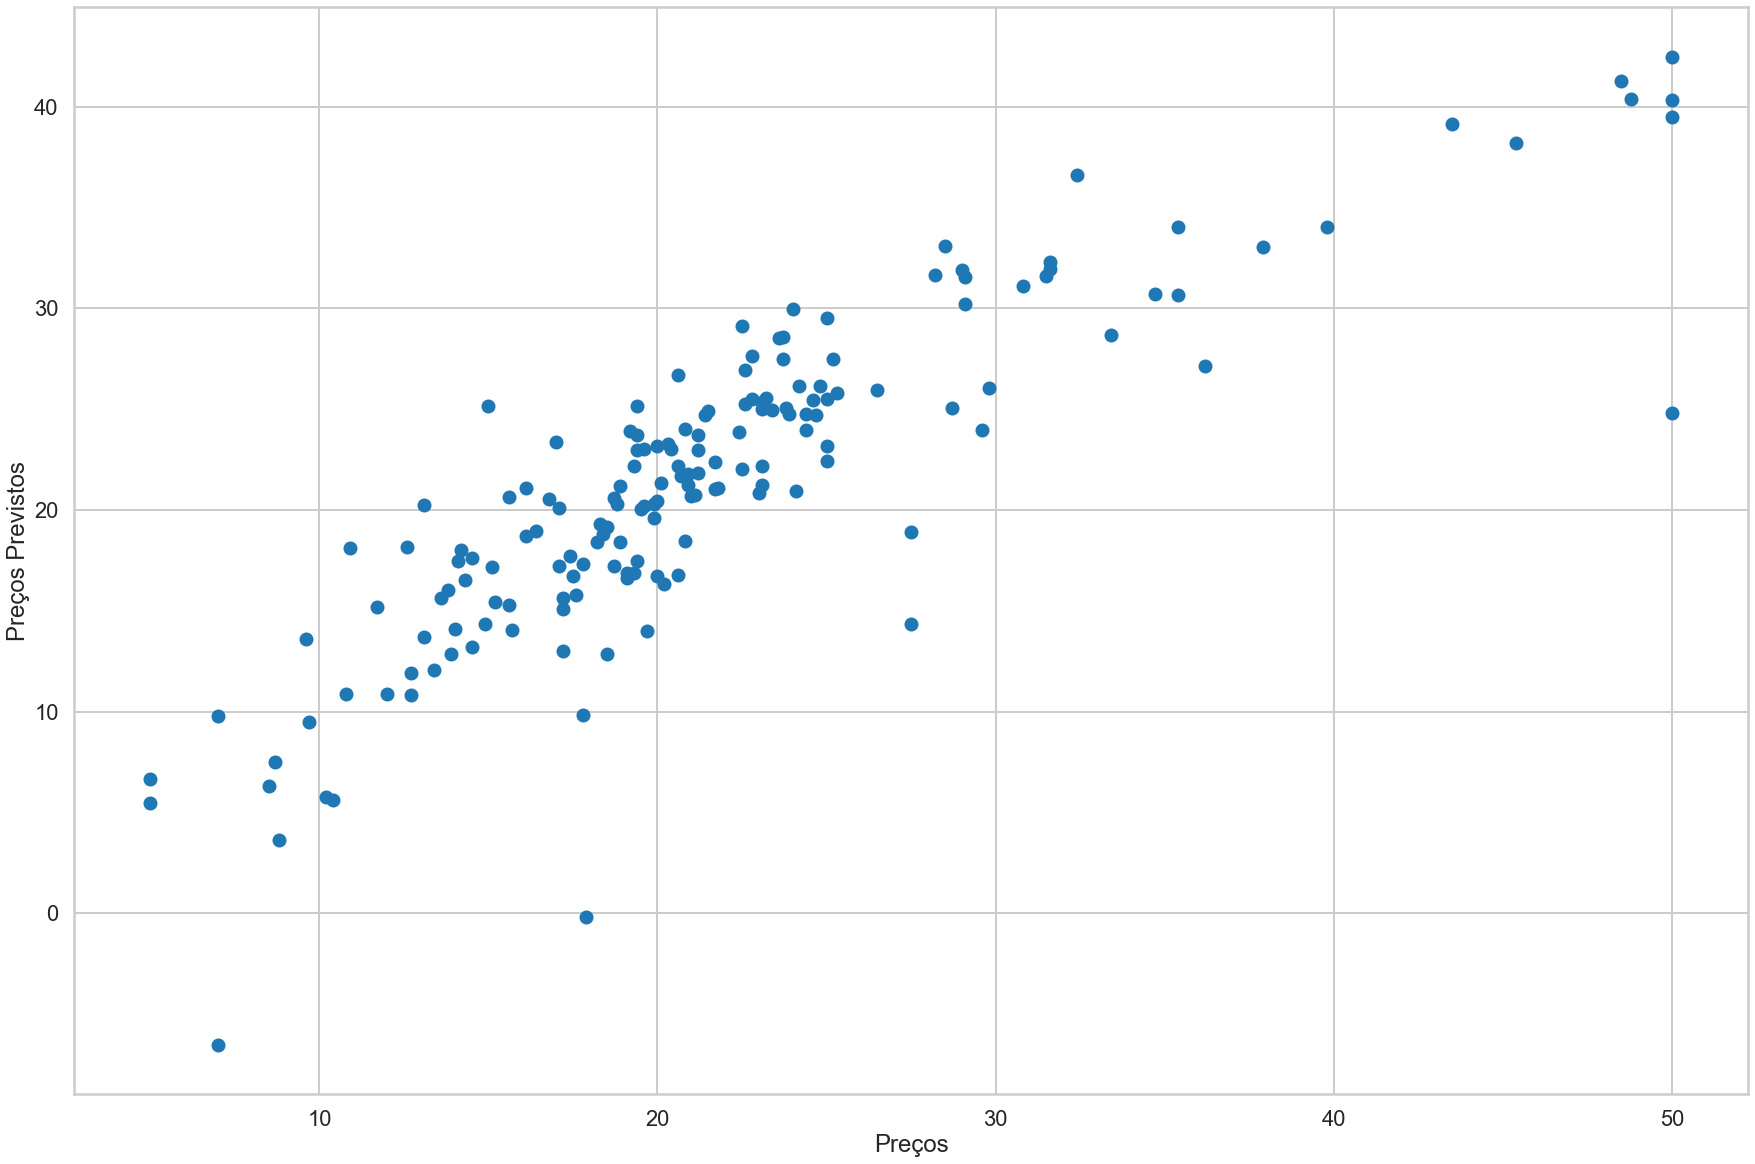

In [95]:
Y_pred = regr.predict(X_test)

plt.scatter(y_test, Y_pred)
X_plot = np.linspace(0,1,100)
plt.xlabel("Preços")
plt.ylabel("Preços Previstos")
plt.rcParams['figure.figsize'] = (30, 20)
plt.show()

In [96]:
#MAE (Erro médio absoluto)
#O erro médio absoluto (MAE), é a distância vertical média entre cada ponto e a linha de identidade . 
#MAE é também a distância horizontal média entre cada ponto e a linha de identidade.

MAE = mean_absolute_error(y_test,Y_pred)
print("MAE = {:0.3f}".format(MAE))

MAE = 3.148


In [97]:
#Uma medida frequentemente usada na verificação da acurácia de modelos numéricos é o Erro Quadrático Médio (MSE)
#como descrito. O MSE é similar ao MAE, porém mais sensível aos grandes erros, 
#por elevar as diferenças individuais ao quadrado. MSE é sempre positivo. MSE = 0 indica simulação perfeita. 
#MSE é definido por:

MSE = mean_squared_error(y_test,Y_pred)
print("MSE = {:0.4f}".format(MSE))

MSE = 20.7240


In [98]:
#ROOT MEAN SQUARE ERROR (RMSE)
#A medida de erro mais comumente usada para aferir a qualidade do ajuste de um modelo é a chamada RAIZ DO ERRO MÉDIO QUADRÁTICO
#Ela é a raiz do erro médio quadrático da diferença entre a predição e o valor real.

RMSE = np.sqrt(MSE)
print("RMSE = {:0.3f}".format(RMSE))

#RMSE é uma boa medida, porque geralmente ela representa explicitamente o que vários métodos tendem a minimizar.

RMSE = 4.552


# GridSeach

In [99]:
#GridSearchCV
#O GridSearchCV é uma ferramenta usada para automatizar o processo de ajuste dos parâmetros de um algoritmo, 
#pois ele fará de maneira sistemática diversas combinações dos parâmetros e depois de avaliá-los os armazenará 
#num único objeto.
#O GridSearchCV é um módulo do Scikit Learn e é amplamente usado para automatizar
#grande parte do processo de tuning. O objetivo primário do GridSearchCV é a criação de combinações de parâmetros
#para posteriormente avaliá-las.

Usamos um regressor cuja previsão é aleatória. Para comparar a qualidade dos nossos modelos.

In [100]:
baseline = DummyRegressor()

De acordo com a documentação ele precisa dos parâmetros a seguir:

GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)

Mais antes definimos as métricas que queremos medir, todas estão na nesse link. Vamos definir uma lista com todas as de regressão:

In [101]:
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']

O Grid Search faz os cross validation de vários modelos com hiperparâmetros diferentes de uma vez. No param_grid definimos quais modelos com quais parâmetros o nosso Grid Search vai rodar.

Na documentação ela diz que pode ser um dicionário ou uma lista de dicionários.

Definimos um dicionário com os parâmetros do nosso estimador. Antes usamos o método get_params pra ver o nome dos parâmetros do DummyRegressor:

In [102]:
baseline.get_params().keys()

dict_keys(['constant', 'quantile', 'strategy'])

In [103]:
hyper = {'strategy':['mean', 'median', 'quantile', 'constant'],
         'quantile':[.75],
         'constant':[300000]}

Dessa forma, o nosso Grid Search vai rodar quatro modelos, cada um com uma das estratégias.

Quantile
Constant
Definimos verbose=100 pra ele ir falando o que ele ta fazendo passo a passo.
Colocamos para fazer o refit no neg_mean_squared_error. Para escolher o modelo com o menor erro quadrado médio. E depois, a gente pede pra não retornar os scores de treinamento

O GridSearchCV separar o dataset em 3 partes e vai devolver a métrica média de cada uma dessas 3.

Com os dados em várias partes vamos fazer o cross validation com cada um deles.

In [104]:
meu_primeiro_grid = GridSearchCV(baseline, param_grid=hyper, scoring=metricas, verbose=100, refit='neg_mean_squared_error', return_train_score=False)

Madamos o Grid Search rodar nos dados de boston

In [105]:
meu_primeiro_grid.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] constant=300000, quantile=0.75, strategy=mean ...................
[CV]  constant=300000, quantile=0.75, strategy=mean, explained_variance=0.000, neg_mean_absolute_error=-4.373, neg_mean_squared_error=-34.562, neg_mean_squared_log_error=-0.060, neg_median_absolute_error=-2.966, r2=-0.001, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] constant=300000, quantile=0.75, strategy=mean ...................
[CV]  constant=300000, quantile=0.75, strategy=mean, explained_variance=0.000, neg_mean_absolute_error=-7.019, neg_mean_squared_error=-96.607, neg_mean_squared_log_error=-0.116, neg_median_absolute_error=-4.662, r2=-0.061, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] constant=300000, quantile=0.75, strategy=mean ...................
[CV]  consta

GridSearchCV(estimator=DummyRegressor(),
             param_grid={'constant': [300000], 'quantile': [0.75],
                         'strategy': ['mean', 'median', 'quantile',
                                      'constant']},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_mean_squared_log_error',
                      'neg_median_absolute_error', 'r2'],
             verbose=100)

Conferindo os resultados

Melhor estimador foi:

In [106]:
meu_primeiro_grid.best_estimator_

DummyRegressor(constant=300000, quantile=0.75, strategy='median')

E o melhor score foi:

In [107]:
meu_primeiro_grid.best_score_

-94.53672170452339

Definimos o neg_mean_squared_error no refite ele está devolvendo o melhor score dessa métrica.

Essa métrica da a média do quadrado dos erros, só que negativa.

Acho que eles adotão esse padrão para colocar das métricas todas negativas

O erro é a diferença entre o que o modelo preveu e o valor verdadeiro da casa
Como a melhor estratégia foi a mediana, a previsão do modelo foi a mediana dos valores de treinamento pra toda casa nova.

A gente pega a diferença do previsto pelo verdadeiro e eleva ao quadrado (normal em estatística pra evitar que erros negativos e positivos se anulem

Então pra ter uma ideia se isso ta bom ou ruim basta tirar a raiz disso:

In [108]:
np.sqrt(meu_primeiro_grid.best_score_*-1)

9.722999624834065

Em média nosso modelo errou o preço por 9 mil dólares.

O Grid Search retorna um dicionário com todos os resultados:

In [109]:
pd.set_option('max_columns',200)
pd.DataFrame(meu_primeiro_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_constant,param_quantile,param_strategy,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,split3_test_explained_variance,split4_test_explained_variance,mean_test_explained_variance,std_test_explained_variance,rank_test_explained_variance,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_mean_squared_log_error,split1_test_neg_mean_squared_log_error,split2_test_neg_mean_squared_log_error,split3_test_neg_mean_squared_log_error,split4_test_neg_mean_squared_log_error,mean_test_neg_mean_squared_log_error,std_test_neg_mean_squared_log_error,rank_test_neg_mean_squared_log_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.002792,0.001164,0.004786,0.000977,300000,0.75,mean,"{'constant': 300000, 'quantile': 0.75, 'strate...",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,-4.372797,-7.019362,-9.150808,-7.266618,-8.314558,-7.224828,1.617093,2,-3.456246e+01,-9.660661e+01,-1.603823e+02,-9.743027e+01,-9.118228e+01,-9.603278e+01,3.986294e+01,2,-0.059673,-0.115759,-0.166850,-0.244611,-0.295770,-0.176533,0.085200,2,-2.966089,-4.661728,-5.955802,-5.244938,-8.037037,-5.373119,1.658450,2,-7.893654e-04,-6.118247e-02,-1.002596e+00,-1.107994e-01,-2.429412e+00,-7.209557e-01,9.299864e-01,2
1,0.001795,0.000399,0.004388,0.001353,300000,0.75,median,"{'constant': 300000, 'quantile': 0.75, 'strate...",0.000000e+00,0.000000e+00,0.000000e+00,1.110223e-16,0.000000e+00,2.220446e-17,4.440892e-17,2,-4.343137,-6.978218,-9.984158,-6.724752,-6.846535,-6.975360,1.792254,1,-3.664054e+01,-1.014166e+02,-1.781952e+02,-9.015287e+01,-6.627832e+01,-9.453672e+01,4.736202e+01,1,-0.059512,-0.119999,-0.196072,-0.218281,-0.238580,-0.166489,0.066873,1,-2.950000,-3.900000,-6.900000,-4.400000,-7.000000,-5.030000,1.635726,1,-6.096228e-02,-1.140186e-01,-1.225015e+00,-2.782998e-02,-1.492761e+00,-5.841174e-01,6.388306e-01,1
2,0.004190,0.001716,0.004787,0.001934,300000,0.75,quantile,"{'constant': 300000, 'quantile': 0.75, 'strate...",0.000000e+00,0.000000e+00,2.220446e-16,0.000000e+00,1.110223e-16,6.661338e-17,8.881784e-17,1,-5.496078,-7.659406,-7.418812,-9.568317,-12.033663,-8.435255,2.213876,3,-4.383172e+01,-9.117980e+01,-1.185886e+02,-1.307766e+02,-1.705883e+02,-1.109930e+02,4.219926e+01,3,-0.081466,-0.120128,-0.107841,-0.324011,-0.444606,-0.215610,0.143468,3,-5.000000,-6.300000,-4.200000,-7.900000,-12.000000,-7.080000,2.760725,3,-2.691898e-01,-1.571329e-03,-4.807436e-01,-4.909802e-01,-5.415913e+00,-1.331679e+00,2.049873e+00,3
3,0.002670,0.001887,0.004016,0.000674,300000,0.75,constant,"{'constant': 300000, 'quantile': 0.75, 'strate...",-2.204903e-13,-4.207745e-13,1.714184e-13,-1.332268e-14,2.201572e-13,-5.260237e-14,2.407750e-13,4,-299977.599020,-299975.578218,-299970.295050,-299979.962376,-299983.900000,-299977.466933,4.530611,4,-8.998656e+10,-8.998535e+10,-8.998218e+10,-8.998798e+10,-8.999034e+10,-8.998648e+10,2.718143e+06,4,-90.087885,-89.166385,-85.178324,-93.471254,-96.584717,-90.897713,3.881491,4,-299978.350000,-299978.800000,-299973.300000,-299980.

Vamos checar se com Regressão Linear fica melhor

In [110]:
ols = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
ols.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [112]:
ols_params = {'fit_intercept':[True, False],
              'normalize':[True, False]}

Rodamos novamente o GridSarchCV

In [113]:
meu_segundo_grid = GridSearchCV(ols, param_grid=ols_params, verbose=100, refit='neg_mean_squared_error', return_train_score=True)

In [114]:
meu_segundo_grid.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.747, test=0.639), total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.728, test=0.714), total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.695, test=0.587), total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV]  fit_intercept=True, normalize=True, score=(train=0.842, test=0

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             refit='neg_mean_squared_error', return_train_score=True,
             verbose=100)

In [115]:
meu_segundo_grid.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [116]:
meu_segundo_grid.best_score_

0.4096770503863622

# Cross_validade

In [117]:
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier

Carregamos os dados do dataset de breast_cancer do scikit

In [1]:
cancer = datasets.load_breast_cancer()

NameError: name 'datasets' is not defined

In [119]:
X = cancer.data
y = cancer.target

In [120]:
classificador = DummyClassifier()

Chamos o cross_validate que de acordo com a documentação ele precisa dos parâmetros a seguir:

cross_validate(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2n_jobs’, return_train_score=’warn’)*

In [121]:
cross_validate(classificador, X, y, return_train_score=False,
               scoring=['accuracy',
                        'average_precision',
                        'f1',
                        'precision',
                        'recall',
                        'roc_auc'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior i

{'fit_time': array([0.00099707, 0.00099683, 0.        , 0.00099754, 0.0009954 ]),
 'score_time': array([0.01196933, 0.01096725, 0.01097012, 0.00598574, 0.00897622]),
 'test_accuracy': array([0.62280702, 0.52631579, 0.48245614, 0.57894737, 0.46017699]),
 'test_average_precision': array([0.62873734, 0.6240425 , 0.60076394, 0.59703947, 0.63621588]),
 'test_f1': array([0.7114094 , 0.63013699, 0.58156028, 0.66666667, 0.56737589]),
 'test_precision': array([0.67948718, 0.61333333, 0.5942029 , 0.66666667, 0.57142857]),
 'test_recall': array([0.74647887, 0.64788732, 0.56944444, 0.66666667, 0.56338028]),
 'test_roc_auc': array([0.51244677, 0.50262037, 0.42757937, 0.41666667, 0.5165996 ])}

Mais antes definimos as métricas que queremos medir, vVamos definir uma lista com todas as de regressão:

In [122]:
 metricas = ['accuracy', 'average_precision', 'f1', 'precision', 'recall', 'roc_auc']

Dessa forma, vemos que a acurácia do nosso classificador foi 61% no primeiro teste, 56%, 45%, 50% e 61%.

Usamos um outro classificador "melhor"

In [123]:
#ele faz uma validação cruzada embutida
ridge = RidgeClassifier()

In [124]:
cross_validate(ridge, X, y, return_train_score=False,
               scoring=metricas)

{'fit_time': array([0.00498104, 0.00398684, 0.00298119, 0.00298905, 0.00299168]),
 'score_time': array([0.00799298, 0.00998306, 0.00698447, 0.00898123, 0.00897574]),
 'test_accuracy': array([0.92105263, 0.94736842, 0.96491228, 0.95614035, 0.98230088]),
 'test_average_precision': array([0.98520747, 0.99678241, 0.99942122, 0.98993757, 0.99901042]),
 'test_f1': array([0.93793103, 0.95945946, 0.97297297, 0.96644295, 0.98611111]),
 'test_precision': array([0.91891892, 0.92207792, 0.94736842, 0.93506494, 0.97260274]),
 'test_recall': array([0.95774648, 1.        , 1.        , 1.        , 1.        ]),
 'test_roc_auc': array([0.97772683, 0.99475925, 0.99900794, 0.9864418 , 0.99832327])}

Ele tem uma acurácia média de 92%! Bem melhor do que o nosso classificador aleatório

Realizando a média e comparando os classificadores

In [125]:
np.array([0.48245614, 0.55263158, 0.53508772, 0.52631579, 0.57522124]).mean(), np.array([0.92105263, 0.94736842, 0.96491228, 0.95614035, 0.98230088]).mean()

(0.5343424939999999, 0.954354912)

# Árvore de Decisão

In [126]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [127]:
classifier_dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5, max_depth=None, random_state=10)

In [128]:
classifier_dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [129]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

meu_terceiro_grid = GridSearchCV(classifier_dt, params, verbose=100, cv=3)

meu_terceiro_grid.fit(X, y)

classifier_dt.fit(X, y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.868, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.889, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=2, score=0.894, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.868, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | 

[CV]  max_leaf_nodes=6, min_samples_split=4, score=0.900, total=   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.3s remaining:    0.0s
[CV] max_leaf_nodes=6, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=4, score=0.942, total=   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.3s remaining:    0.0s
[CV] max_leaf_nodes=6, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=6, min_samples_split=4, score=0.910, total=   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s remaining:    0.0s
[CV] max_leaf_nodes=7, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=7, min_samples_split=2, score=0.900, total=   0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.3s remaining:    0.0s
[CV] max_leaf_nodes=7, min_samples_split=2 ...........................
[CV]  max_leaf_nodes=7, min_samples_split=2, score=0.942, total=   0.0s
[Parallel(n_jobs=1)]: Done  47 out o

[CV] max_leaf_nodes=11, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=11, min_samples_split=3, score=0.910, total=   0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.7s remaining:    0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=11, min_samples_split=4, score=0.900, total=   0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.7s remaining:    0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=11, min_samples_split=4, score=0.947, total=   0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.7s remaining:    0.0s
[CV] max_leaf_nodes=11, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=11, min_samples_split=4, score=0.910, total=   0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.7s remaining:    0.0s
[CV] max_leaf_nodes=12, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=12, min_samp

[CV]  max_leaf_nodes=18, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=18, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=19, min_samples_split=2 ...................

[CV]  max_leaf_nodes=26, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=26, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=4 ...................

[CV]  max_leaf_nodes=33, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=33, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=33, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=33, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=34, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=34, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=34, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=34, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=3 ...................

[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=41, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=41, min_samples_split=4 ...................

[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=48, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=49, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=49, min_samples_split=2 ...................

[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=56, min_samples_split=4, score=0.947, total=

[CV]  max_leaf_nodes=64, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=64, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=65, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=65, min_samples_split=3 ...................

[CV] max_leaf_nodes=72, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=72, min_samples_split=4, score=0.910, total=

[CV]  max_leaf_nodes=79, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=79, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=80, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ...................

[CV]  max_leaf_nodes=85, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=86, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=86, min_samples_split=4 ...................

[CV]  max_leaf_nodes=92, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=92, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=92, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=92, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=92, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=92, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=92, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=92, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=92, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=92, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=92, min_samples_split=4, score=0.910, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=93, min_samples_split=2, score=0.900, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=2 ...................

[CV]  max_leaf_nodes=99, min_samples_split=2, score=0.947, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=2 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=2, score=0.910, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=3, score=0.900, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=3, score=0.947, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=3 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=3, score=0.910, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=4, score=0.900, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ..........................
[CV]  max_leaf_nodes=99, min_samples_split=4, score=0.947, total=   0.0s
[CV] max_leaf_nodes=99, min_samples_split=4 ...................

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=10)

In [130]:
meu_terceiro_grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, min_samples_leaf=5, random_state=10)

In [131]:
meu_terceiro_grid.best_score_

0.9191404437018472

In [132]:
from io import StringIO
from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

feature_cols = cancer.feature_names

dot_data = StringIO()
export_graphviz(classifier_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
Random Forest

In [ ]:
Banggins